In [14]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [15]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import time

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


# Load and process data

In [16]:
train = pd.read_csv("../dataset/trainset.csv")
test = pd.read_csv("../dataset/testset.csv")

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501546 entries, 0 to 1501545
Data columns (total 40 columns):
aspect_ratio                      1501546 non-null float64
courant_number                    1501546 non-null float64
shockfront_courant_number         1501546 non-null float64
shockfront_number_ratio           1501546 non-null float64
min_total_mobility                1501546 non-null float64
max_total_mobility                1501546 non-null float64
average_total_mobility            1501546 non-null float64
min_Darcy_velocity                1501546 non-null float64
max_Darcy_velocity                1501546 non-null float64
average_Darcy_velocity            1501546 non-null float64
min_shockfront_mobratio           1501546 non-null float64
max_shockfront_mobratio           1501546 non-null float64
average_shockfront_mobratio       1501546 non-null float64
average_longitudinal_capillary    1501546 non-null float64
average_transverse_capillary      1501546 non-null float64
ma

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375387 entries, 0 to 375386
Data columns (total 40 columns):
aspect_ratio                      375387 non-null float64
courant_number                    375387 non-null float64
shockfront_courant_number         375387 non-null float64
shockfront_number_ratio           375387 non-null float64
min_total_mobility                375387 non-null float64
max_total_mobility                375387 non-null float64
average_total_mobility            375387 non-null float64
min_Darcy_velocity                375387 non-null float64
max_Darcy_velocity                375387 non-null float64
average_Darcy_velocity            375387 non-null float64
min_shockfront_mobratio           375387 non-null float64
max_shockfront_mobratio           375387 non-null float64
average_shockfront_mobratio       375387 non-null float64
average_longitudinal_capillary    375387 non-null float64
average_transverse_capillary      375387 non-null float64
max_longitudinal_ca

In [20]:
#train = train[train.backtrack_par_factor!=-0.01]
print('Train instances: ', train.shape[0])
#test = test[test.backtrack_par_factor!=-0.01]
print('Test instances: ', test.shape[0])

Train instances:  1501546
Test instances:  375387


In [21]:
print('Test train split: ',f'{test.shape[0]/(train.shape[0]+test.shape[0]):.2f}')

Test train split:  0.20


## Split inputs (X) and outputs (y)

In [22]:
features = ['aspect_ratio',
        'courant_number',
        'shockfront_courant_number',
        'shockfront_number_ratio',
        #'min_total_mobility',
        #'max_total_mobility',
        'average_total_mobility',
        #'min_Darcy_velocity',
        #'max_Darcy_velocity',
        'average_Darcy_velocity',
        #'min_shockfront_mobratio',
        #'max_shockfront_mobratio',
        'average_shockfront_mobratio',
        'average_longitudinal_capillary',
        'average_transverse_capillary',
        #'max_longitudinal_capillary',
        #'max_transverse_capillary',
        #'min_longitudinal_capillary',
        #'min_transverse_capillary',
        'average_buoyancy_number',
        'average_longitudinal_buoyancy',
        'average_transverse_buoyancy',
        #'max_buoyancy_number',
        #'max_longitudinal_buoyancy',
        #'max_transverse_buoyancy',
        #'min_buoyancy_number',
        #'min_longitudinal_buoyancy',
        #'min_transverse_buoyancy',
        'average_overrelaxation',
        #'max_overrelaxation',
        #'min_overrelaxation',
        #'average_invPeclet',
        #'max_invPeclet',
        #'min_invPeclet',
        'res',
        'resold',
        'res_resold',
         #'backtrack_par_factor',
         #'outer_nonlinear_iteration',
        'Inner_non_linear_iterations']

# Train set
X_train = train[features]
y_train = train["backtrack_par_factor"].values
# Test set
X_test = test[features]
y_test = test["backtrack_par_factor"].values

## Normalize data

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

stdnorm_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

X_train_stdnorm = stdnorm_pipeline.fit_transform(X_train)
X_test_stdnorm = stdnorm_pipeline.transform(X_test)

In [24]:
# Normalize data for checking
mean = X_train.mean(axis=0)
std = X_train.std(axis=0, ddof=0)
X_train_stdnorm2 = (X_train - mean)/std 
X_test_stdnorm2 = (X_test - mean)/std

print("mean:\n", mean)
print("\nstd:\n", std)

mean:
 aspect_ratio                      4.606498e+00
courant_number                    4.134381e+01
shockfront_courant_number         1.312609e+01
shockfront_number_ratio           1.869254e-02
average_total_mobility            7.138944e+02
average_Darcy_velocity            3.206514e-06
average_shockfront_mobratio       1.012754e+00
average_longitudinal_capillary    3.133900e-03
average_transverse_capillary      8.245164e-02
average_buoyancy_number           9.482336e-02
average_longitudinal_buoyancy     1.752161e-01
average_transverse_buoyancy       2.600834e+00
average_overrelaxation           -2.709370e+09
res                               2.655941e-06
resold                            1.865938e-05
res_resold                        8.406276e-01
Inner_non_linear_iterations       1.148470e+01
dtype: float64

std:
 aspect_ratio                      1.685133e+00
courant_number                    2.110226e+03
shockfront_courant_number         6.861566e+02
shockfront_number_ratio        

In [25]:
print(np.allclose(X_train_stdnorm, X_train_stdnorm2.values))
print(np.allclose(X_test_stdnorm, X_test_stdnorm2.values))

True
True


# Fine Tuning

## sklearn ET

In [26]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try combinations of hyperparameters
    {'bootstrap': [True, False], 
     'n_estimators': [30, 50, 70], 
     'max_features': [0.1, 0.4, 0.7, 1.0],
     'max_depth': [20, 30, 40],
     'min_samples_leaf': [2, 4, 8]}  
    ]

# train across 3 folds
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=42),
                           param_grid, 
                           cv=3,
                           scoring='neg_mean_squared_error',
                           return_train_score=True, 
                           verbose = 1,
                           n_jobs= 60)

grid_search.fit(X_train_stdnorm, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=60)]: Using backend LokyBackend with 60 concurrent workers.
[Parallel(n_jobs=60)]: Done  80 tasks      | elapsed:  2.4min
/home/viluiz/anaconda3/envs/py3ml/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=60)]: Done 330 tasks      | elapsed: 12.2min
[Parallel(n_jobs=60)]: Done 648 out of 648 | elapsed: 41.4min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                           max_depth=None, max_features='auto',
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators='warn', n_jobs=None,
                                           oob_score=False, random_state=42,
                                           verbose=0, warm_start=False),
             iid='warn', n_jobs=60,
             param_grid=[{'bootstrap': [True, False], 'max_depth': [20, 30, 40],
                          'max_features': [0.

In [27]:
reg_best = grid_search.best_estimator_

print(grid_search.best_params_, end='\n')
print(grid_search.best_estimator_)

{'bootstrap': False, 'max_depth': 40, 'max_features': 1.0, 'min_samples_leaf': 2, 'n_estimators': 70}
ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=40,
                    max_features=1.0, max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=2, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
                    oob_score=False, random_state=42, verbose=0,
                    warm_start=False)


In [28]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.3198288731135126 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.1, 'min_samples_leaf': 2, 'n_estimators': 30}
0.3195673658422437 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.1, 'min_samples_leaf': 2, 'n_estimators': 50}
0.3193448862777103 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.1, 'min_samples_leaf': 2, 'n_estimators': 70}
0.32104282353896635 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.1, 'min_samples_leaf': 4, 'n_estimators': 30}
0.3204519825298621 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.1, 'min_samples_leaf': 4, 'n_estimators': 50}
0.3202676520827877 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.1, 'min_samples_leaf': 4, 'n_estimators': 70}
0.3214333025038313 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.1, 'min_samples_leaf': 8, 'n_estimators': 30}
0.3206287712341808 {'bootstrap': True, 'max_depth': 20, 'max_features': 0.1, 'min_samples_leaf': 8, 'n_estimators': 50}
0.32049542208763343 {'bootstrap': True,

In [29]:
sorted(zip(np.sqrt(-cvres["mean_test_score"]), cvres["params"]), key=lambda cvres: cvres[0], reverse=False)

[(0.10748077190064972,
  {'bootstrap': False,
   'max_depth': 40,
   'max_features': 1.0,
   'min_samples_leaf': 2,
   'n_estimators': 70}),
 (0.10763639183777719,
  {'bootstrap': False,
   'max_depth': 40,
   'max_features': 0.7,
   'min_samples_leaf': 2,
   'n_estimators': 70}),
 (0.10777408773478646,
  {'bootstrap': False,
   'max_depth': 40,
   'max_features': 0.7,
   'min_samples_leaf': 2,
   'n_estimators': 50}),
 (0.10778164788261893,
  {'bootstrap': False,
   'max_depth': 40,
   'max_features': 1.0,
   'min_samples_leaf': 2,
   'n_estimators': 50}),
 (0.1083109280968273,
  {'bootstrap': False,
   'max_depth': 40,
   'max_features': 0.7,
   'min_samples_leaf': 2,
   'n_estimators': 30}),
 (0.10850927182817374,
  {'bootstrap': False,
   'max_depth': 40,
   'max_features': 1.0,
   'min_samples_leaf': 2,
   'n_estimators': 30}),
 (0.11088334875167545,
  {'bootstrap': False,
   'max_depth': 40,
   'max_features': 0.4,
   'min_samples_leaf': 2,
   'n_estimators': 50}),
 (0.1110045741

In [30]:
sorted(zip(reg_best.feature_importances_, list(X_train)), reverse=True)

[(0.2328429675024808, 'res_resold'),
 (0.11155108902265119, 'Inner_non_linear_iterations'),
 (0.07236088099066239, 'res'),
 (0.06920646376320114, 'shockfront_courant_number'),
 (0.06352570394327799, 'resold'),
 (0.06307360393137688, 'average_overrelaxation'),
 (0.05517779350663321, 'aspect_ratio'),
 (0.04748679522011382, 'average_shockfront_mobratio'),
 (0.04307394259049716, 'average_total_mobility'),
 (0.04233728601377495, 'shockfront_number_ratio'),
 (0.03808929699166489, 'average_Darcy_velocity'),
 (0.032601623230984915, 'courant_number'),
 (0.03244215548471747, 'average_longitudinal_buoyancy'),
 (0.025125911824092687, 'average_transverse_buoyancy'),
 (0.025035870021002413, 'average_buoyancy_number'),
 (0.023715630439117712, 'average_longitudinal_capillary'),
 (0.022352985523750403, 'average_transverse_capillary')]

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

start = time.time()
y_train_pred = reg_best.predict(X_train_stdnorm)
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_train, y_train_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_train, y_train_pred)
print('mae: ',mae)

r2_model = reg_best.score(X_train_stdnorm, y_train)
print('\nR2: ',r2_model)

time =  -65.73825931549072

mse:  0.001520670459974385
rmse:  0.038995774899011626
mae:  0.021964103659313713

R2:  0.9853126785530179


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

start = time.time()
y_test_pred = reg_best.predict(X_test_stdnorm)
end = time.time()
print("time = ", start - end)
print()

mse = mean_squared_error(y_test, y_test_pred)
print('mse: ',mse)
rmse = np.sqrt(mse)
print('rmse: ',rmse)
mae = mean_absolute_error(y_test, y_test_pred)
print('mae: ',mae)

r2_model = reg_best.score(X_test_stdnorm, y_test)
print('\nR2: ',r2_model)

time =  -15.103592157363892

mse:  0.010117486246115907
rmse:  0.10058571591491462
mae:  0.05324533626663166

R2:  0.9024234693284844


rmse -0.01:  0.117   |   mae -0.01:  0.095
rmse -0.1:  0.080   |   mae -0.1:  0.063
rmse -0.2:  0.099   |   mae -0.2:  0.044
rmse -0.3:  0.082   |   mae -0.3:  0.036
rmse -0.4:  0.070   |   mae -0.4:  0.031
rmse -0.5:  0.065   |   mae -0.5:  0.031
rmse -0.6:  0.069   |   mae -0.6:  0.035
rmse -0.7:  0.086   |   mae -0.7:  0.045
rmse -0.8:  0.107   |   mae -0.8:  0.054
rmse -0.9:  0.138   |   mae -0.9:  0.072
rmse -1.0:  0.150   |   mae -1.0:  0.072


Text(0, 0.5, 'mae')

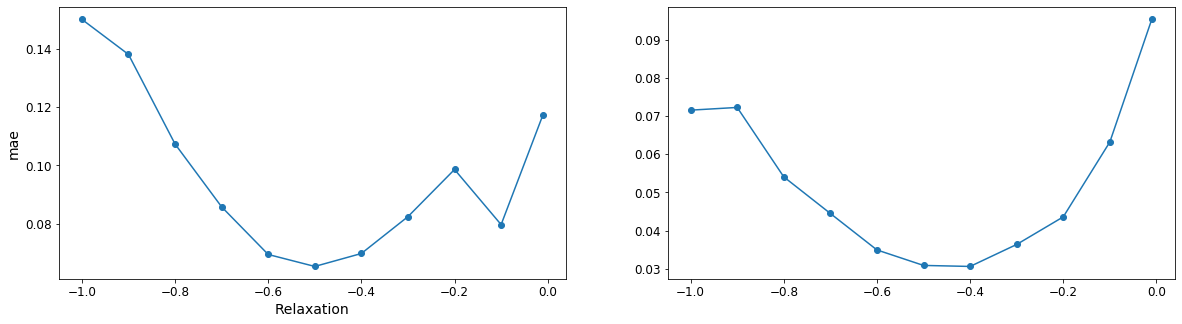

In [33]:
rmse = []
mae = []
btpf = [-0.01, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1.0]
btpf_plot = []
for i in btpf:
    if np.any(y_test==i):
        btpf_plot.append(i)
        rmse.append(np.sqrt(mean_squared_error(y_test[y_test==i], y_test_pred[y_test==i])))
        mae.append(mean_absolute_error(y_test[y_test==i], y_test_pred[y_test==i]))
        print(f'rmse {i}: ', f'{rmse[-1]:.3f}', '  |' ,f'  mae {i}: ', f'{mae[-1]:.3f}')

fig,ax = plt.subplots(1,2,figsize=(20,5))        
ax[0].plot(btpf_plot,rmse,'o-')
ax[0].set_xlabel('Relaxation')
ax[0].set_ylabel('rmse')
ax[1].plot(btpf_plot,mae,'o-')
ax[0].set_xlabel('Relaxation')
ax[0].set_ylabel('mae')

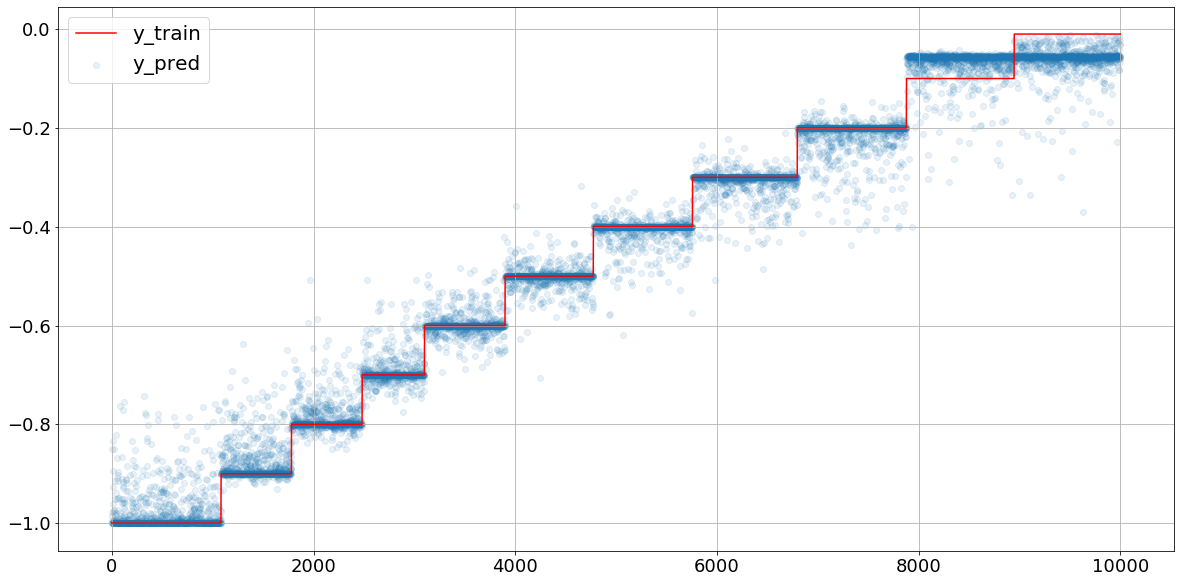

In [34]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, ax = plt.subplots(1,1, figsize=[20,10])

aux_train = y_train[:10000]
aux_pred = y_train_pred[:10000]
index = np.argsort(aux_train)
x = range(len(index))
plt.plot(x, aux_train[index], 'r-')
plt.scatter(x, aux_pred[index], alpha=0.1)
plt.legend(['y_train', 'y_pred'])
#plt.ylim([-10,70])
plt.grid()
plt.show()

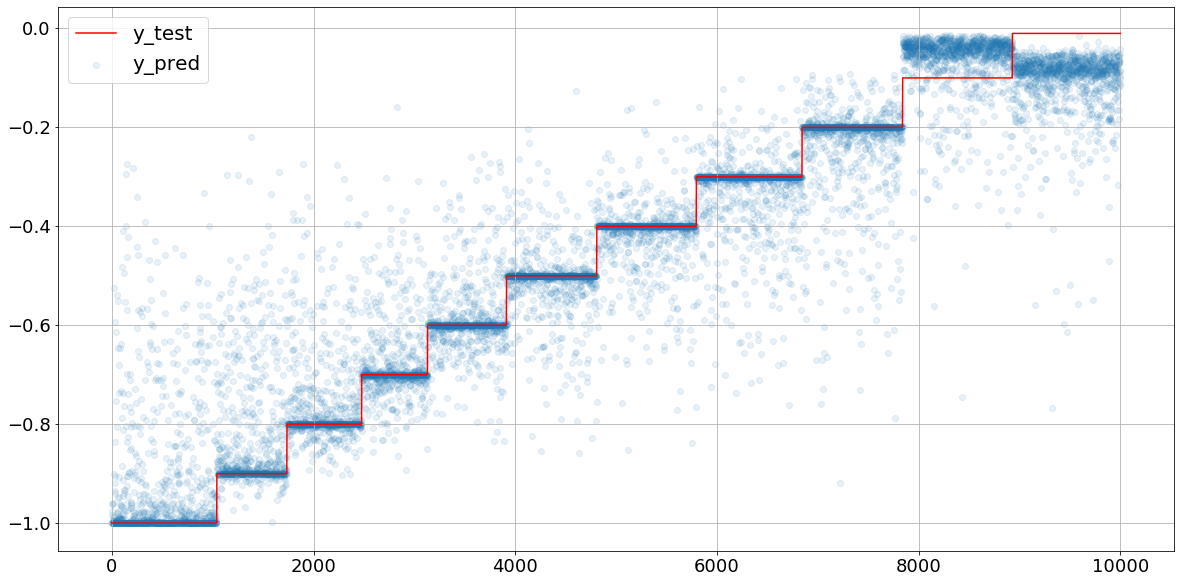

In [35]:
mpl.rcParams.update({'font.size': 20})
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
mpl.rc('axes', labelsize=22)
fig, ax = plt.subplots(1,1, figsize=[20,10])

aux_test = y_test[:10000]
aux_pred = y_test_pred[:10000]
index = np.argsort(aux_test)
x = range(len(index))
plt.plot(x, aux_test[index], 'r-')
plt.scatter(x, aux_pred[index], alpha=0.1)
plt.legend(['y_test', 'y_pred'])
#plt.ylim([-10,70])
plt.grid()
plt.show()

## Run time

In [36]:
start = time.time()
for i in range(1000):  
    reg_best.predict(X_test_stdnorm[0:1])
end = time.time()
print("time = ", (start - end)/1000)
print()

time =  -0.0034802231788635253



## Model persistence

In [37]:
final_model = Pipeline([
        ("stdnorm", stdnorm_pipeline),
        ("RFreg", reg_best)
        ])

print('rmse: ', np.sqrt(mean_squared_error(y_test, final_model.predict(X_test))))

rmse:  0.10058571591491462


In [38]:
import joblib
joblib.dump(final_model, "ETmodel_orig_lessfeatures.pkl")
final_model_loaded = joblib.load("ETmodel_orig_lessfeatures.pkl") 

print('rmse: ', np.sqrt(mean_squared_error(y_test, final_model_loaded.predict(X_test))))

rmse:  0.10058571591491462


In [5]:
start = time.time()
final_model_loaded = joblib.load("ETmodel_orig_lessfeatures.pkl") 
end_load = time.time()
print('Load time = ', end_load - start)
for i in range(1000):    
    y_pred = final_model_loaded.predict(X_test[0:1])
print('Prediction time = ', (time.time() - end_load)/1000)

Load time =  1.638369083404541
Prediction time =  0.0037274935245513916
